# Circle plot and Correlation scatter plot

The low-dimensional coordinate mappings by the circular
coordinate is not only used as a visual representation, but also can
be used as a data representation with reduced dimension so that it
can be further feeded to data analysis frameworks. We first describe
the pipeline for the circular coordinate as a dimension reduction,
and compare it with PCA, in particular, how the topological structure
of the data is preserved under these two dimension reductions. We
will see with an example that linear dimension reduction methods such
as the PCA can break down the topological structure of the data while
the circular coordinate preserves the topological structure.

First, we describe how to use the circular coordinates
as a dimension reduction. In other words, from the data $X$, we use
the circular coordinates to create a data representation $X^{cc}$
with reduced dimension so that $X^{cc}$ can be further feeded to
data analysis frameworks. Given the circular coordinates $\theta_{1},\ldots,\theta_{k}:X=\{X_{1},\ldots,X_{n}\}\to S^{1}$,
we understand $S^{1}\subset\mathbb{R}^{2}$ and create a map $\Theta:X\to\mathbb{R}^{2k}$
as for each $X_{i}\in X$, 
$$
\Theta(X_{i})=(\theta_{1}(X_{i}),\ldots,\theta_{k}(X_{i}))\in\mathbb{R}^{2k}.
$$
Then the data representation $X^{cc}$ with reduced dimension is defined
as $X^{cc}=\{\Theta(X_{1}),\ldots,\Theta(X_{n})\}$, i.e. $X_{i}^{cc}=\Theta(X_{i})$.

Using the circular coordinates as a dimension reduction
has several benefits. First, since the reduced representation of the
data is from the circular coordinates, which is again from the persistent
cohomology, this representation focuses more on the topological structure
of the data and less on how it is geometrically embedded. In particular,
the circular coordinates representation does not depend on rotations
or translations. Second, if we choose the circular coordinates $\theta_{1},\ldots,\theta_{k}$
corresponding to significant topological features, the resulting circular
coordinates representation focuses on these significant topological
features and denoises topological noise in the data structure.

In [1]:
import dionysus
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

Duplicate key in file '/home/jisuk1/.config/matplotlib/matplotlibrc', line 2 ('backend : Agg')


In [2]:
import os

In [3]:
def persistence_diagram_vr(dataset, maxscale, prime = 23):
    #Compute Persistence Diagrams#
    #Choose the prime base for the coefficient field that we use to construct the persistence cohomology.
    print('Base coefficient field: Z/', prime ,'Z',sep='')
    print('Maximal scale:', maxscale)
    #print('Persistence threshold for selecting significant cocycles:',threshold)
    vr = dionysus.fill_rips(dataset, 2, float(maxscale))
    #Vietoris-Rips complex
    cp = dionysus.cohomology_persistence(vr, prime, True)
    #Create the persistent cohomology based on the chosen parameters.
    dgms = dionysus.init_diagrams(cp, vr)
    #Calculate the persistent diagram using the designated coefficient field and complex.
    #now = datetime.datetime.now()
    #print('>>>>>>End Time (VR-computation):',now.strftime("%Y-%m-%d %H:%M:%S"))
    ###Plot the barcode and diagrams using matplotlib incarnation within Dionysus2. This mechanism is different in Dionysus.
    #Plots of persistence barcodes of Vietoris-Rips complex for dimension 0 and 1.    
    
    return dgms

# Dataset and its persistent cohomology
Now, we compare how the topological structure of
the data is preserved under the circular coordinates and the PCA.
To see this, we use the dataset $X\subset\mathbb{R}^{2}$ in the plot,
which is a dataset of $50$ points equidistantly sampled on a figure-$8$ shape.

In [4]:
m = 25
n = m * 2
np.random.seed(0)

dataset = np.zeros((n, 2))
T = np.linspace(0, 1-1/(m+1), num=m)
dataset[0:m, 0] = np.cos(2 * np.pi * T) - 1
dataset[0:m, 1] = np.sin(2 * np.pi * T)
dataset[m:(2*m), 0] = np.cos(2 * np.pi * T) + 1
dataset[m:(2*m), 1] = np.sin(2 * np.pi * T)

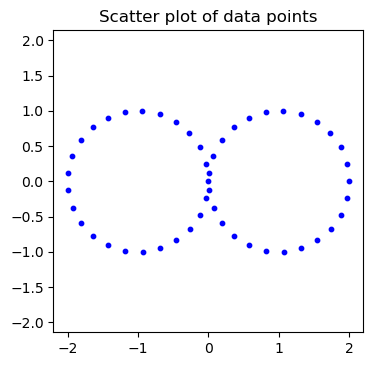

In [5]:
with PdfPages('fig_cp-cp_dataset_scatter.pdf') as pdf:
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.gca().set_xlim([-2.2,2.2])
    plt.gca().set_ylim([-2.2,2.2])
    plt.gca().set_aspect('equal', 'datalim')
    plt.scatter(dataset[:, 0], dataset[:, 1], s=10, c='b')
    #plt.axis('equal')
    plt.title('Scatter plot of data points')
    pdf.savefig(fig)

The persistent cohomology of $X$ is in the plot. As expected from the dataset, the $1$-dimensional persistent cohomology
of $X$ has two prominent topological features.

In [6]:
maxscale = 2.
dgms = persistence_diagram_vr(dataset = dataset, maxscale = maxscale)

Base coefficient field: Z/23Z
Maximal scale: 2.0


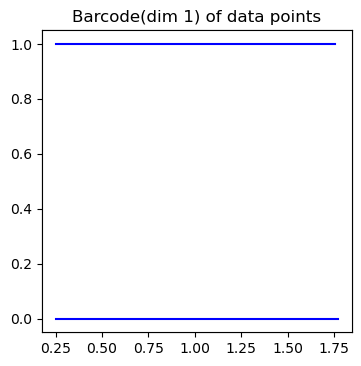

In [7]:
with PdfPages('fig_cp-cp_dataset_ph.pdf') as pdf:
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.xticks([])
    plt.yticks([])
    plt.title('Barcode(dim 1) of data points')
    dionysus.plot.plot_bars(dgms[1], show=True)
    pdf.savefig(fig)

# Computing circular coordinates
Then, we compute the circular coordinates from two cohomological features in the persistent
cohomology.

In [8]:
np.savetxt('cp-cp_dataset.txt', dataset)

In [9]:
os.system("python3 GCC2.py cp-cp_dataset.txt 0.5 2 1e-5 1 2 1000 0")

0

In [10]:
color = np.zeros((n, 2), dtype = float)
color[:, 0] = np.loadtxt('cp-cp_dataset_CircularCoordinates_0.0_0.txt')
color[:, 1] = np.loadtxt('cp-cp_dataset_CircularCoordinates_0.0_1.txt')

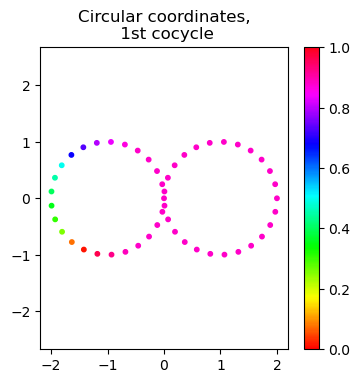

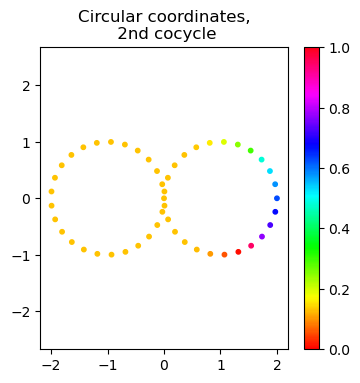

In [11]:
with PdfPages('fig_cp-cp_cc_color.pdf') as pdf:
    for g in range(color.shape[1]):                
        fig = plt.figure(figsize=(4,4), dpi=100)
        plt.scatter(dataset.T[0,:],dataset.T[1,:],s=10, c=color[:, g], cmap="hsv",zorder=10)
        plt.clim(0,1)
        plt.colorbar()
        plt.axis('equal')
        if (g == 0):
            plt.title('Circular coordinates,\n 1st cocycle')
        elif (g == 1):
            plt.title('Circular coordinates,\n 2nd cocycle')
        pdf.savefig(fig)

# Circular coordinates representation and its persistent cohomology
For the circular coordinates representation, we let
$\theta:X\to S^{1}\subset\mathbb{R}^{2}$ to be the circular coordinate
from the prominent cobundary of the persistent cohomology in the previous plot,
and create a map $\Theta:X\to\mathbb{R}^{2}$ by this single circular
coordinate, i.e. $\Theta(X_{i})=\theta(X_{i})$. The resulting circular
coordinates representation $X^{cc}=\{\Theta(X_{1}),\ldots,\Theta(X_{n})\}$
is in the plot.

In [12]:
dataset_cc = np.zeros((dataset.shape[0], 2 * color.shape[1]), dtype = float)
for colIdx in range(color.shape[1]):
    dataset_cc[:, 2 * colIdx] = np.cos(2 * np.pi * color[:, colIdx])
    dataset_cc[:, 2 * colIdx + 1] = np.sin(2 * np.pi * color[:, colIdx])

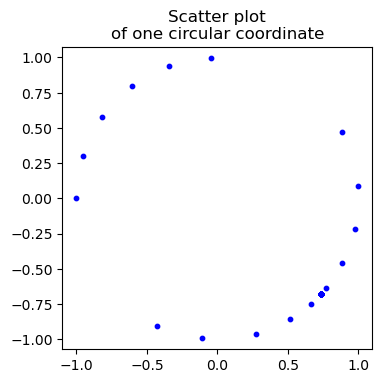

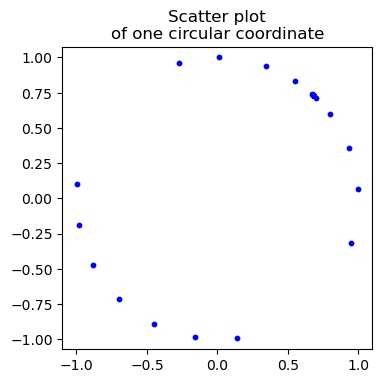

In [13]:
with PdfPages('fig_cp-cp_cc_scatter.pdf') as pdf:
    for colIdx in range(color.shape[1]):
        fig = plt.figure(figsize=(4,4), dpi=100)
        plt.gca().set_xlim([-1.1,1.1])
        plt.gca().set_ylim([-1.1,1.1])
        plt.gca().set_aspect('equal', 'datalim')
        plt.scatter(dataset_cc[:, 2 * colIdx], dataset_cc[:, 2 * colIdx + 1], s=10, c='b')
        #plt.axis('equal')
        plt.title('Scatter plot\nof one circular coordinate')
        pdf.savefig(fig)
        colIdx = colIdx + 1

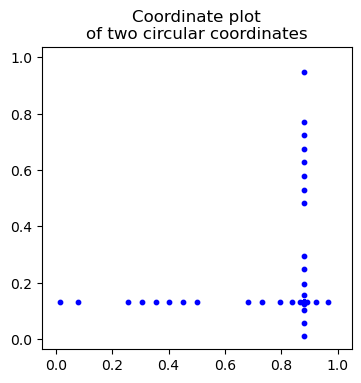

In [14]:
with PdfPages('fig_cp-cp_cc_correlation.pdf') as pdf:    
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.gca().set_xlim([-0.05,1.05])
    plt.gca().set_ylim([-0.05,1.05])
    plt.gca().set_aspect('equal', 'datalim')
    plt.scatter(color[:, 0], color[:, 1], s=10, c='b')
    #plt.axis('equal')
    plt.title('Coordinate plot\nof two circular coordinates')
    pdf.savefig(fig)